# Population Time series project

Project Name - Population Prediction-365 DaysFeture(Time series Data)

Dataset-POP.csv

Pathan Sajid R.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/sajid/Desktop/Time series Project/POP.csv")

In [3]:
df.head()

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.0,1952-01-01,2019-12-06
1,2019-12-06,156527.0,1952-02-01,2019-12-06
2,2019-12-06,156731.0,1952-03-01,2019-12-06
3,2019-12-06,156943.0,1952-04-01,2019-12-06
4,2019-12-06,157140.0,1952-05-01,2019-12-06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   realtime_start  816 non-null    object 
 1   value           816 non-null    float64
 2   date            816 non-null    object 
 3   realtime_end    816 non-null    object 
dtypes: float64(1), object(3)
memory usage: 25.6+ KB


In [5]:
df.isna().sum()

realtime_start    0
value             0
date              0
realtime_end      0
dtype: int64

Removing unnecessary columns
We will drop these columns as any correlation to the outcome would be coincidentally.

In [6]:
df.drop(['realtime_start','realtime_end'],axis=1,inplace=True)
df.head()

,value,date
0,156309.0,1952-01-01
1,156527.0,1952-02-01
2,156731.0,1952-03-01
3,156943.0,1952-04-01
4,157140.0,1952-05-01


In [7]:
df.describe()

,value
count,816.000000
mean,243847.767826
std,50519.140567
min,156309.000000
25%,201725.250000
50%,239557.500000
75%,289364.250000
max,330309.946000


Check for the datatypes of the dataframe

In [8]:
df.dtypes

value    float64
date      object
dtype: object

Convert the date column to datetime and set it as the index

In [9]:
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.set_index('date',inplace=True)
df.head()

,value
date,
1952-01-01,156309.0
1952-02-01,156527.0
1952-03-01,156731.0
1952-04-01,156943.0
1952-05-01,157140.0


Data Visualisation

array([<AxesSubplot:xlabel='date'>], dtype=object)

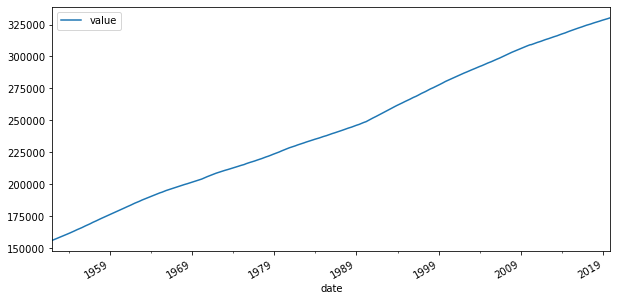

In [10]:
df.plot(subplots=True,figsize=(10,5))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

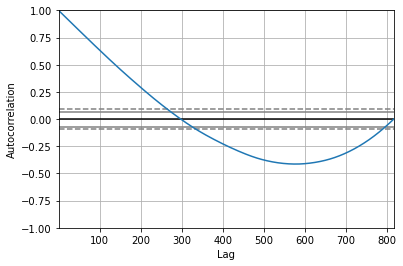

In [11]:
pd.plotting.autocorrelation_plot(df['value'])

In [12]:
df['value'].corr(df['value'].shift(300))

0.9952561189913818

Decompossing the timeseries into its various components.

# Seasonality

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
import statsmodels.api as sm

Decomposition will show the observations and these three elements in the same plot:

Trend: Consistent upward or downward slope of a time series.

Seasonality: Clear periodic pattern of a time series


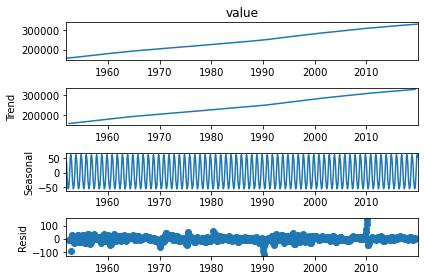

In [14]:
decomposed = seasonal_decompose(df['value'])
x = decomposed.plot()

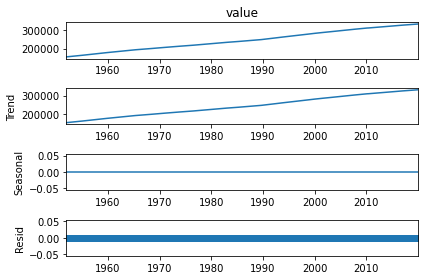

In [15]:
decomposition=sm.tsa.seasonal_decompose(df["value"],model='Additive', period = 1)
fig=decomposition.plot()

The line plot is great for showing seasonality
There is a positive trend from 1952 to 2019.



# ADF Test

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
print('Significance level : 0.05')
adf = adfuller(df['value'])
print(f'ADF test static is {adf[1]}')

Significance level : 0.05
ADF test static is 0.8555297778919895


1st Difference

<AxesSubplot:xlabel='date'>

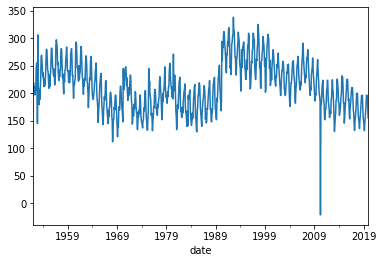

In [18]:
df['stationary'] = df['value'].diff()
df['stationary'].plot()

In [19]:
print('Significance level : 0.05')
adf = adfuller(df['stationary'].dropna())
print(f'ADF test static is {adf[1]}')

Significance level : 0.05
ADF test static is 0.282251227664476


2nd Difference

<AxesSubplot:xlabel='date'>

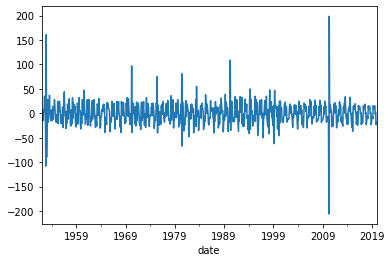

In [20]:
df['stationary2'] = df['stationary'].diff()
df['stationary2'].plot()

In [21]:
print('Significance level : 0.05')
adf = adfuller(df['stationary2'].dropna())
print(f'ADF test static is {adf[1]}')

Significance level : 0.05
ADF test static is 2.110012187584744e-10


ADF ststic implies, the data become stationary. We can now proceed to modelling the forcast.

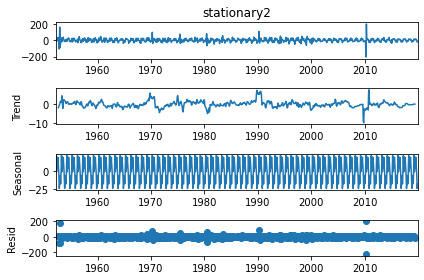

In [22]:
t = seasonal_decompose(df['stationary2'].dropna())
x = t.plot()

# Forcasting

Auto-Regression

In [23]:
from statsmodels.tsa.ar_model import AR
#Creating train & Test dataset
X = df['stationary2'].dropna()

train_df,test_df = X[1:(len(X)-280)],X[(len(X)-280):]

In [24]:
#Training the model
model = AR(train_df)
model_fitted = model.fit()

C:\Users\sajid\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:\

In [25]:
print(f'The chosen lag value is {model_fitted.k_ar}',end='\n \n')

print(f'The coefficents are {model_fitted.params}')

The chosen lag value is 18
 
The coefficents are const              0.112100
L1.stationary2    -0.435618
L2.stationary2    -0.205406
L3.stationary2    -0.218530
L4.stationary2    -0.250063
L5.stationary2    -0.210592
L6.stationary2    -0.164454
L7.stationary2    -0.172706
L8.stationary2    -0.182645
L9.stationary2    -0.086436
L10.stationary2   -0.068322
L11.stationary2    0.011219
L12.stationary2    0.476137
L13.stationary2    0.296761
L14.stationary2    0.174946
L15.stationary2    0.102033
L16.stationary2    0.071411
L17.stationary2    0.038107
L18.stationary2    0.006437
dtype: float64


Make predictions

In [26]:
predictions = model_fitted.predict(start=len(train_df),
                                   end=len(train_df)+len(test_df)-1,
                                   dynamic=False)

Comparing with actual data

In [27]:
compare_df = pd.concat([test_df,predictions],axis=1).rename(columns={'stationary2': 'actual', 0:'predicted'})

<AxesSubplot:>

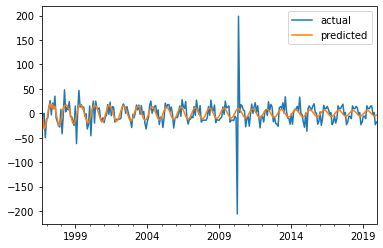

In [28]:
compare_df.plot()

In [29]:
# ARIMA

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
model = ARIMA(df['value'].diff().dropna(),(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\sajid\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\sajid\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  814
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3651.467
Method:                       css-mle   S.D. of innovations             21.465
Date:                Mon, 17 May 2021   AIC                           7312.934
Time:                        10:22:29   BIC                           7336.444
Sample:                    03-01-1952   HQIC                          7321.958
                         - 12-01-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0712      0.135     -0.527      0.598      -0.336       0.194
ar.L1.D.value     0.7105      0.037     19.061      0.000       0.637       0.784
ma.L1.D.value    -0.9259      0.041    -

C:\Users\sajid\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Here MA2 have a p-value which is way below the significant level. And AR value is also good.Hence we may move along with that.

<AxesSubplot:title={'center':'Density'}, ylabel='Density'>

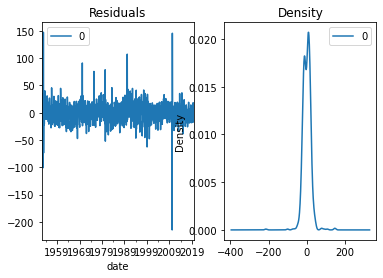

In [32]:
residuals = pd.DataFrame(model_fit.resid)

fig,axes = plt.subplots(1,2)

residuals.plot(title='Residuals',ax= axes[0])
residuals.plot(kind= 'kde', title='Density',ax= axes[1])

There are residual values which requires our consideration.

Let's plot the predicted values.

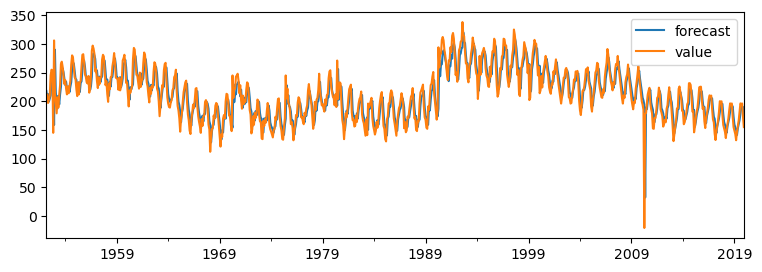

In [33]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':100})
x = model_fit.plot_predict(dynamic=False)
plt.show()

Out of Time Cross-Validation

In [34]:
#Train & Test Data
train_data = df['value'][:500]
test_data = df['value'][500:]

In [35]:
model1 = ARIMA(train_data,order=(1,1,2))
model_fitted1 = model1.fit(disp= -1)

C:\Users\sajid\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\sajid\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [36]:
fc,se,conf = model_fitted1.forecast(316)

In [37]:
from pandas import Series,DataFrame
fc_series = Series(fc,index=test_data.index)
lower_series = Series(conf[:,0],index=test_data.index)
upper_series = Series(conf[:,1],index=test_data.index)

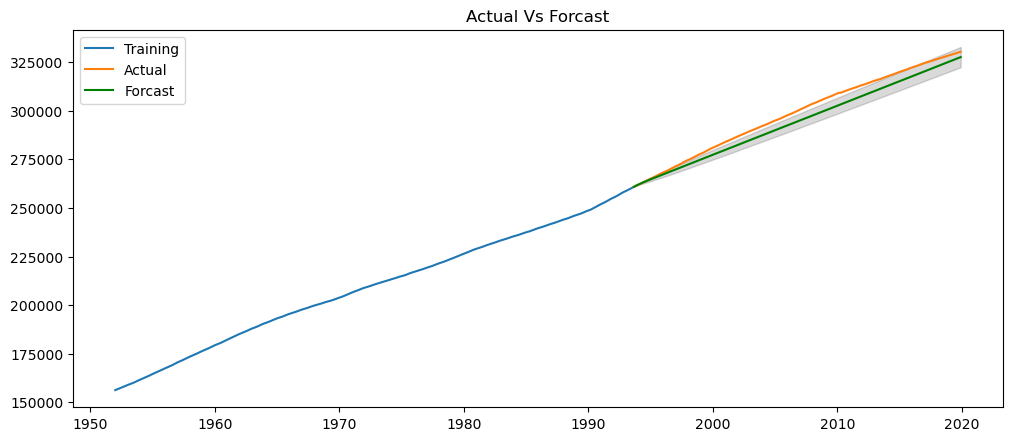

In [38]:
plt.figure(figsize=(12,5), dpi=100)

plt.plot(train_data,label='Training')
plt.plot(test_data,label='Actual')
plt.plot(fc_series,label='Forcast',color='green')

plt.fill_between(lower_series.index,lower_series,upper_series,color='k',alpha=.15)

plt.title('Actual Vs Forcast')
plt.legend(loc='upper left')

The graphs is self-explanatory, that the model we implemented has predicted with pretty much accuracy.

Conclusion : Implemented time-series forcasting model with AutoRegression and ARIMA with much accuracy.